In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib

In [95]:
# load the  dataset from a CSV file
netflix_df = pd.read_csv('netflix_titles.csv') 
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [96]:
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [97]:
netflix_df.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [98]:
netflix_df.isnull().values.any()

True

In [99]:
netflix_df.isnull().sum().sum()

4307

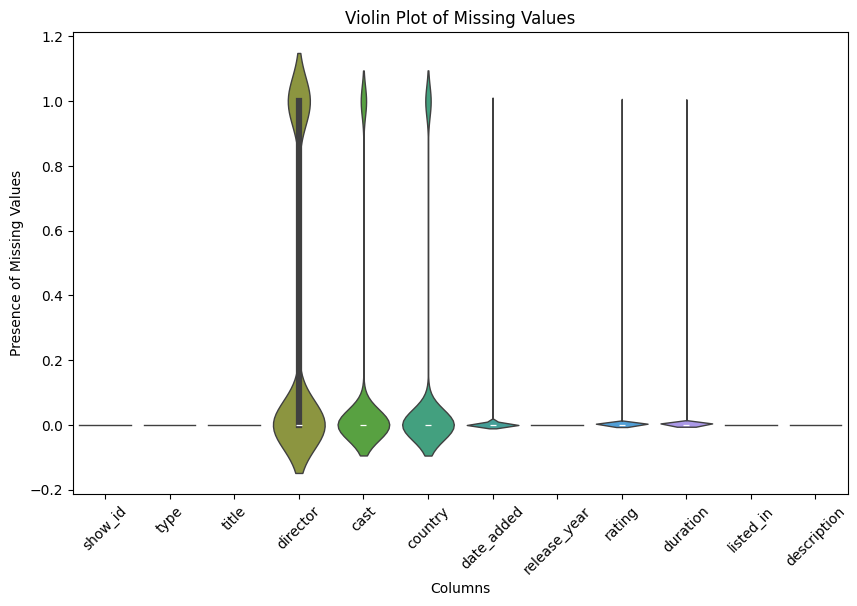

In [101]:
#finding missing values presense using plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=netflix_df.isnull(), linewidth=1)
plt.title('Violin Plot of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Presence of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [102]:
#finding the sum of null values in each columns
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [103]:
#filling null values
netflix_df['director'].fillna('No Director', inplace=True)
netflix_df['cast'].fillna('No Cast', inplace=True)
netflix_df['country'].fillna('Country Unavailable', inplace=True)
netflix_df['date_added'].fillna('Date Unavailable', inplace=True)
netflix_df['rating'].fillna('No rating', inplace=True) 
netflix_df.dropna(subset=['duration'],inplace=True)

In [104]:
#checking if null values are present
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [106]:
#Splitting the Dataset into movies and tv shows
netflix_movies_df = netflix_df[netflix_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [107]:
#tv shows
netflix_Shows_df=netflix_df[netflix_df['type']=='TV Show'].copy()
netflix_Shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [110]:
#Data Preparation
#data transformations for columns related to the duration or seasons of movies and TV shows in two separate DataFrames
#For netflix_movies_df 
# Convert 'duration' to string and then replace ' min' with an empty string
netflix_movies_df['duration'] = netflix_movies_df['duration'].astype(str).str.replace(' min','')

# Convert the cleaned strings to integers
netflix_movies_df['duration'] = pd.to_numeric(netflix_movies_df['duration'], errors='coerce').fillna(0).astype(int)

In [111]:
# Rename 'duration' column to 'seasons' in netflix_shows_df if necessary
netflix_Shows_df.rename(columns={'duration': 'seasons'}, inplace=True)

# Replace specific values in 'seasons' column in netflix_shows_df
netflix_Shows_df['seasons'].replace({'1 Season': '1 Seasons'}, inplace=True)

# Convert 'seasons' to string, remove ' Seasons' text, and then convert to integers
netflix_Shows_df['seasons'] = netflix_Shows_df['seasons'].astype(str).str.replace(' Seasons','')
netflix_Shows_df['seasons'] = pd.to_numeric(netflix_Shows_df['seasons'], errors='coerce').fillna(0).astype(int)

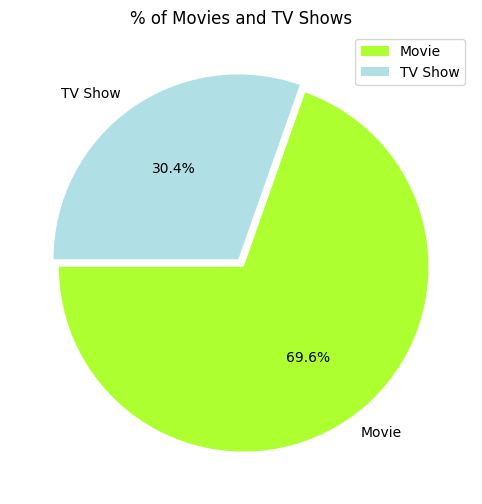

In [113]:
#Exploratory Analysis and Visualization
plt.figure(figsize=(12,6))
plt.title("% of Movies and TV Shows")
g = plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), 
labels=netflix_df.type.value_counts().index, colors=['greenyellow','powderblue'],
autopct='%1.1f%%', startangle=180 );
plt.legend()
plt.show()

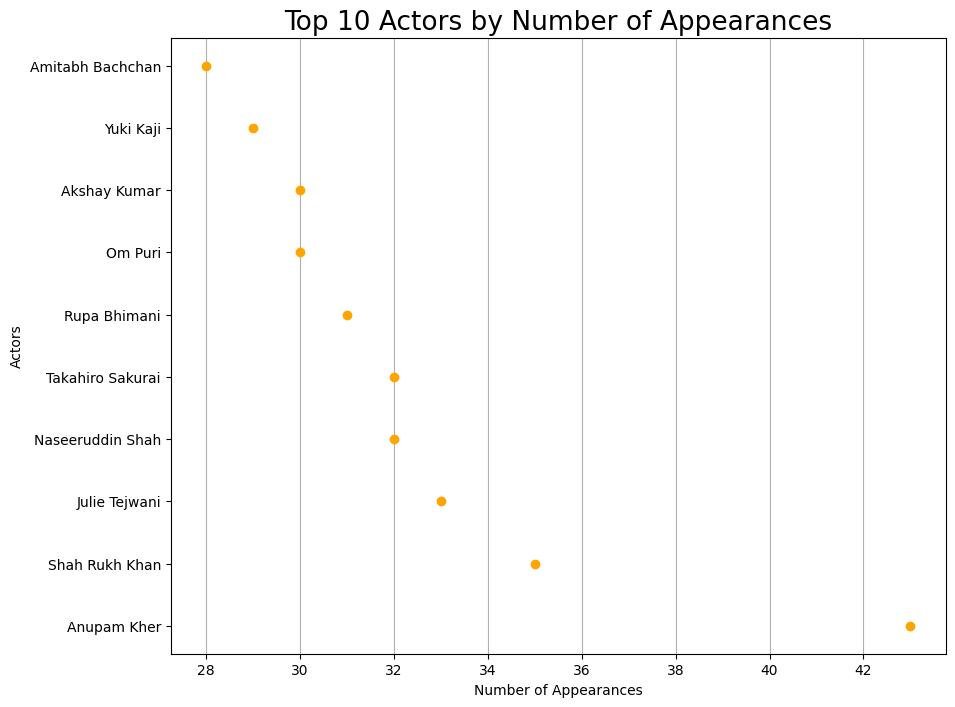

In [119]:
#finding Top 10 actors
plt.figure(figsize=(10, 8))

# Filter out rows where 'cast' data is missing or labeled as 'No Cast'
netflix_filtered = netflix_df[netflix_df['cast'] != 'No Cast']

# Split the 'cast' column by the delimiter (comma) and create separate rows
netflix_filtered['cast'] = netflix_filtered['cast'].str.split(', ')

# Explode the column to separate rows for each actor
netflix_filtered = netflix_filtered.explode('cast')

# Count occurrences of each actor in the 'cast' column after splitting
top_actors = netflix_filtered['cast'].value_counts().head(10)

# Create a Cleveland dot plot
plt.plot(top_actors.values, top_actors.index, 'o', color='orange')

plt.title('Top 10 Actors by Number of Appearances', fontsize=19)
plt.xlabel('Number of Appearances')
plt.ylabel('Actors')
plt.grid(axis='x')  # Add gridlines along the x-axis for better readability

plt.show()


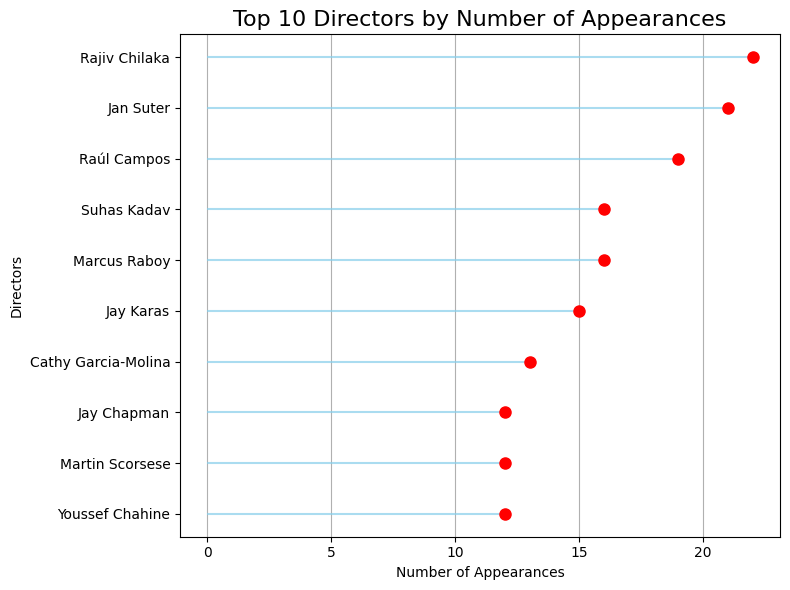

In [122]:
#dumbbell plot to find top director
plt.figure(figsize=(8, 6))

# Sorting the directors by number of appearances
top_directors = top_directors.sort_values()

# Plotting the dumbbell plot
plt.hlines(y=top_directors.index, xmin=0, xmax=top_directors.values, color='skyblue', alpha=0.7)
plt.plot(top_directors.values, top_directors.index, "o", color='red', markersize=8)

plt.title('Top 10 Directors by Number of Appearances', fontsize=16)
plt.xlabel('Number of Appearances')
plt.ylabel('Directors')

plt.grid(axis='x')  # Show gridlines along the x-axis
plt.tight_layout()
plt.show()

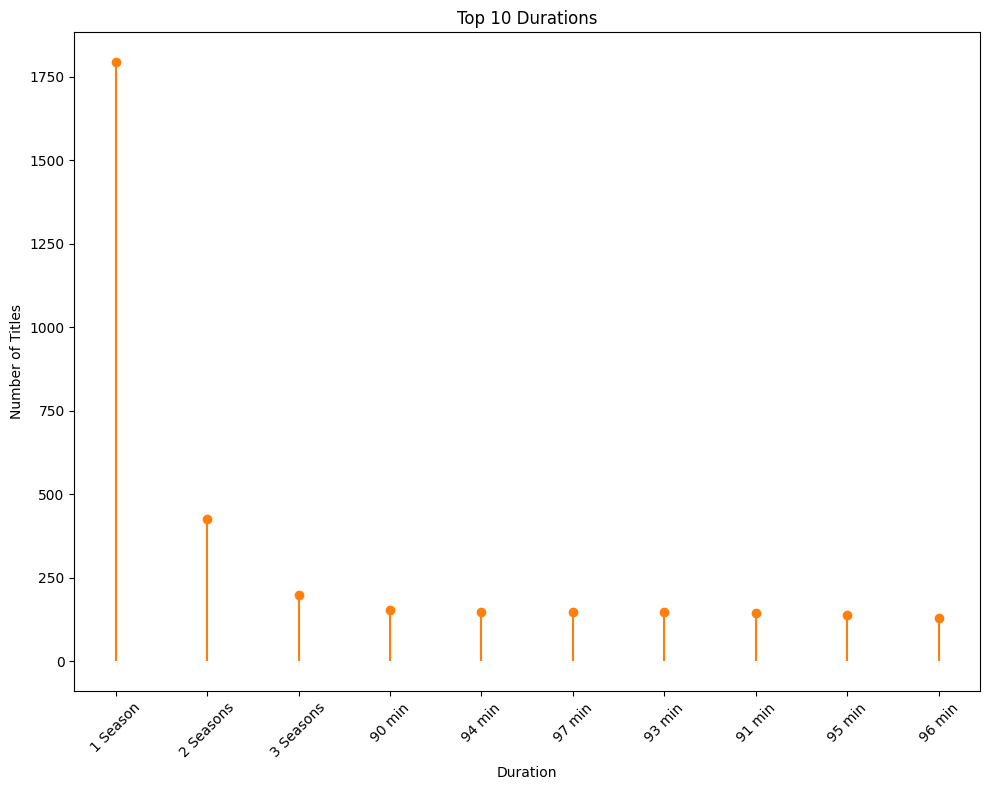

In [130]:
#finding top duration 
top_durations = netflix_df['duration'].value_counts().head(10)

plt.figure(figsize=(10, 8))

# Plotting the lollipop chart with a single color for all stems
plt.stem(top_durations.index, top_durations.values, linefmt='C1-', markerfmt='o', basefmt=' ')

plt.title('Top 10 Durations')
plt.xlabel('Duration')
plt.ylabel('Number of Titles')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()



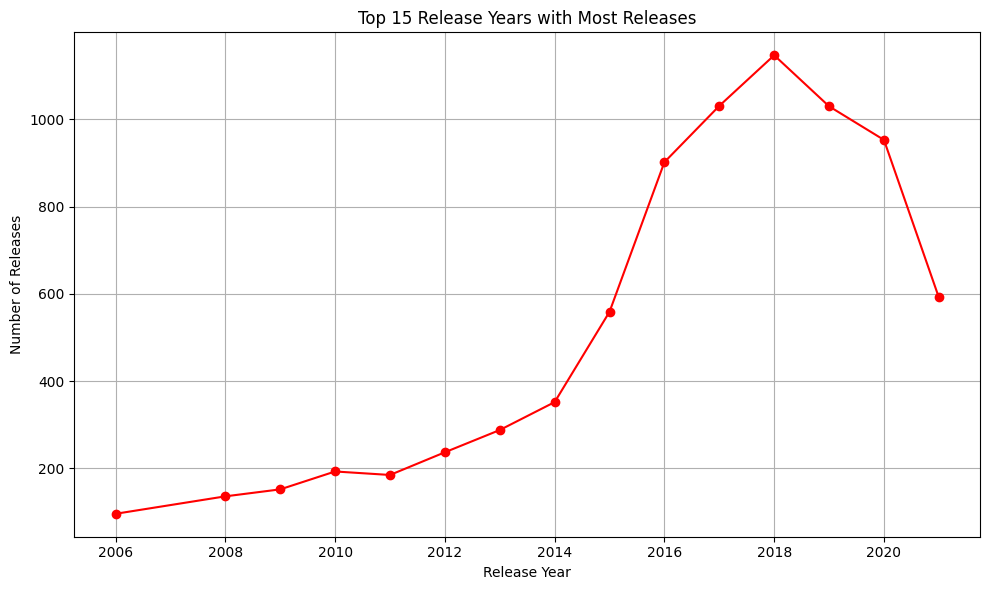

In [131]:
#top releases
# Assuming 'release_year' contains the release year information
release_counts = netflix_df['release_year'].value_counts()

# Select the top N years with the most releases for visualization
top_release_years = release_counts.head(15)

# Sorting the top release years by index (year)
sorted_top_release_years = top_release_years.sort_index()

# Plotting the number of releases for top N years using a line plot
plt.figure(figsize=(10, 6))
sorted_top_release_years.plot(kind='line', marker='o', color='red')
plt.title('Top 15 Release Years with Most Releases')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)  # Add gridlines for better readability
plt.tight_layout()
plt.show()

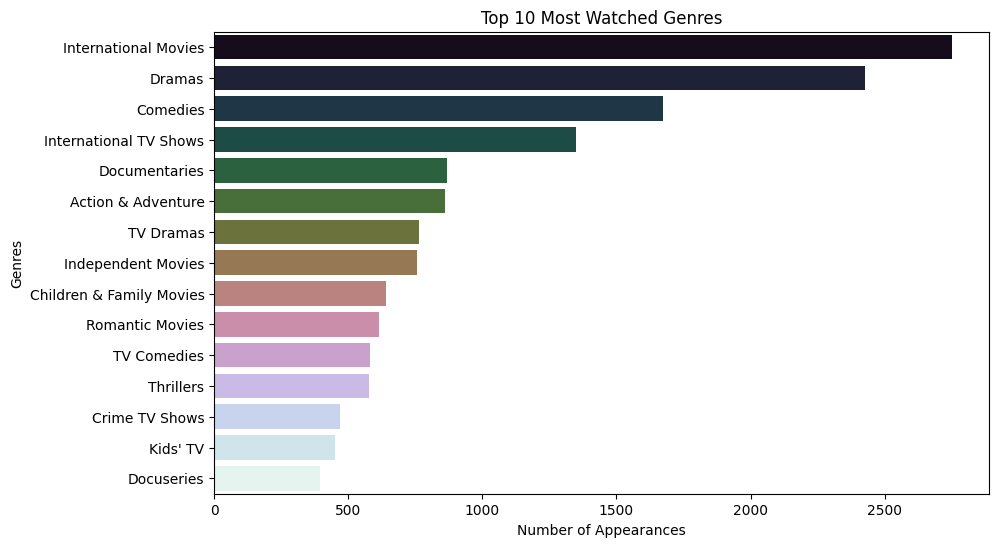

In [133]:
#most watched genre
# Split the 'listed_in' column by the delimiter (assuming it's a comma-separated list)
netflix_df['listed_in'] = netflix_df['listed_in'].str.split(', ')

# Explode the column to separate rows for each genre
netflix_df = netflix_df.explode('listed_in')

# Now, 'listed_in' contains a single genre per row for each movie
# counting occurrences of each genre
genre_counts = netflix_df['listed_in'].value_counts()

# Select the top 10 genres with most appearances
top_genres = genre_counts.head(15)

# Plotting the number of appearances for top genres (horizontal bar plot)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='cubehelix')
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Number of Appearances')
plt.ylabel('Genres')
plt.show()


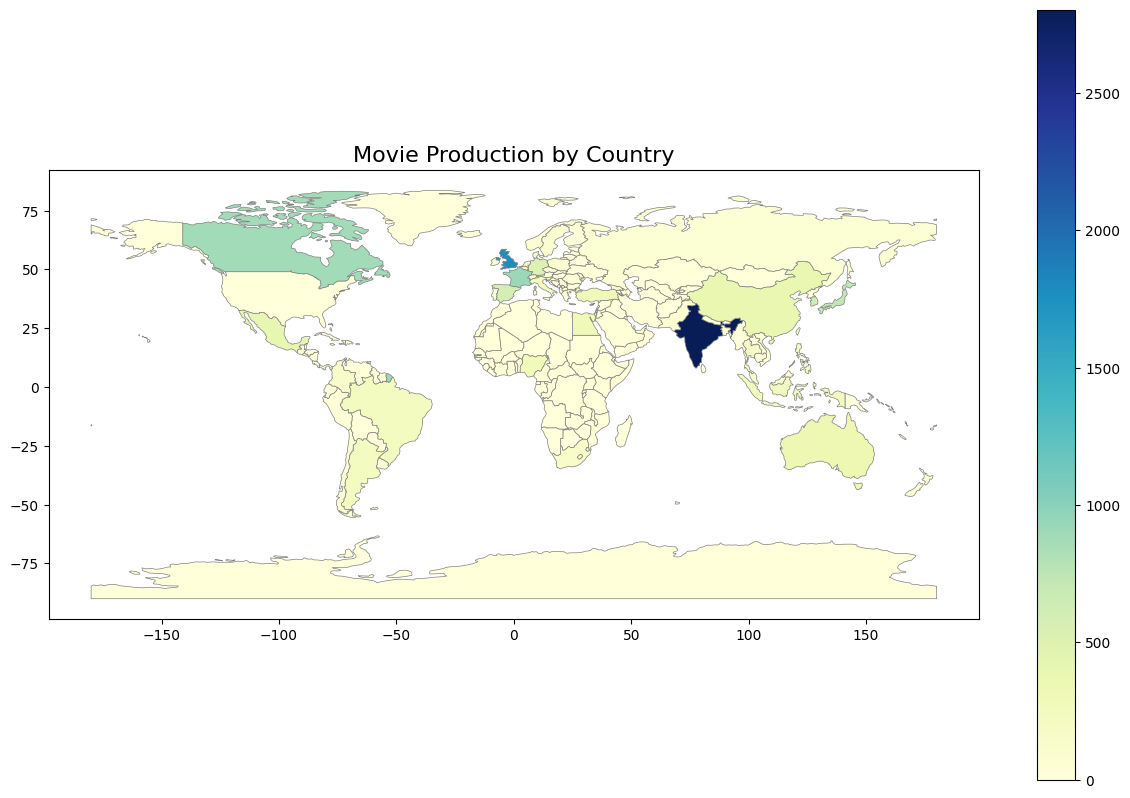

In [135]:
#Movie production
import geopandas as gpd
# Extracting countries and their counts
countries = netflix_df['country'].str.split(', ').explode().value_counts()

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging movie counts with world map
world = world.merge(countries.rename('movie_count'), how='left', left_on='name', right_index=True)
world['movie_count'].fillna(0, inplace=True)

# Plotting the choropleth map with a sequential color scheme
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='movie_count', ax=ax, legend=True, cmap='YlGnBu', edgecolor='gray', linewidth=0.5)
plt.title('Movie Production by Country', fontsize=16)
plt.show()


In [26]:
netflix_from_2001 = netflix_df[netflix_df['release_year'] >= 2001]

# Counting content added each year from 2001
content_per_year = netflix_from_2001['release_year'].value_counts().sort_index()

# Printing the count of content added each year from 2001
print("Content Added Each Year from 2001:")
print(content_per_year)


Content Added Each Year from 2001:
release_year
2001      97
2002     114
2003     133
2004     153
2005     173
2006     219
2007     197
2008     304
2009     343
2010     430
2011     407
2012     522
2013     643
2014     778
2015    1281
2016    1948
2017    2160
2018    2513
2019    2252
2020    2086
2021    1299
Name: count, dtype: int64


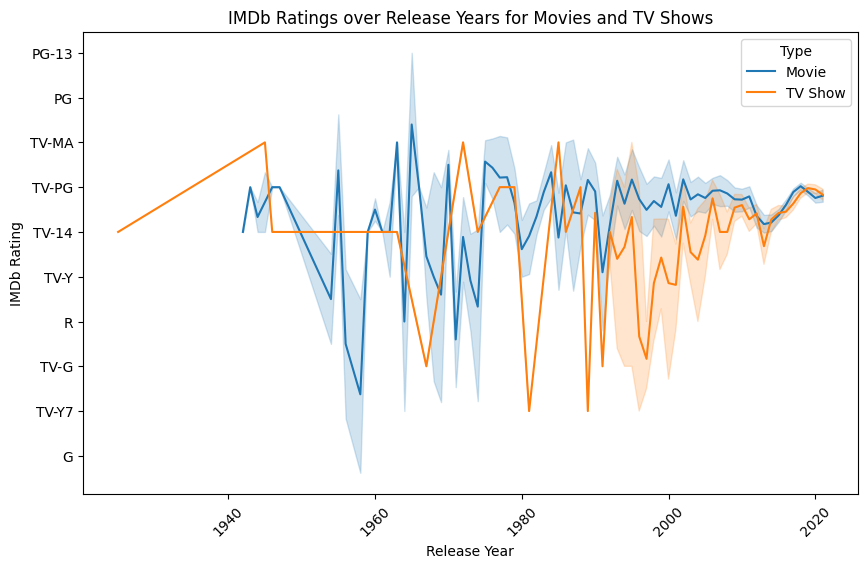

In [27]:
# Filter data for Movies and TV Shows, and drop rows with missing values
filtered_movies = netflix_df[(netflix_df['type'] == 'Movie') & netflix_df['release_year'].notnull()]
filtered_tv_shows = netflix_df[(netflix_df['type'] == 'TV Show') & netflix_df['release_year'].notnull()]

# Concatenate Movies and TV Shows data
combined_data = pd.concat([filtered_movies, filtered_tv_shows])

# Line plot for IMDb ratings over release years for Movies and TV Shows combined
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='rating', hue='type', data=combined_data)
plt.title('IMDb Ratings over Release Years for Movies and TV Shows')
plt.xlabel('Release Year')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()
